### Generate network flow model for embryonic manifold

In [6]:
setwd(here::here())

In [7]:
library("metacell")

In [8]:
scdb_init("scrna_db/")

initializing scdb to scrna_db/



In [2]:
library(devtools)
load_all("metacell/metacell/")
load_all("metacell.flow/")
scdb_init("scrna_db/",force_reinit = T)
scfigs_init("figs")
scdb_flow_init()

Loading required package: usethis

i Loading metacell

i Loading metacell.flow

Warning message:
"Need metacell >= 0.3.6 but loaded version is 0.3.5"
initializing scdb to scrna_db/



In [9]:
mat = scdb_mat("emb")
mc_id = "emb"
mgraph_id = "emb_logist"

mc = scdb_mc(mc_id)
cell_time = mat@cell_metadata[names(mc@mc),"age_group_emb"]
names(cell_time) = names(mc@mc)

mgraph = scdb_mgraph(mgraph_id)

net_id = "emb_new"

df_age_groups = read.table(file = "data/emb.age_groups_developmental_time.tsv",sep = "\t",h = T)

In [10]:
mc@color_key

,group,color,gene
,<chr>,<chr>,<chr>
1,Forebrain/Midbrain/Hindbrain,#647A4F,
2,Rostral neural plate,#649146,
3,Surface ectoderm,#f7f79e,
4,Neural crest,#C3C388,
5,Caudal neural plate,#354E23,
6,Neural tube/Floor plate,#CDE088,
7,Definitive ectoderm,#90BF75,
8,Tail bud - neural,#8e7e59,
9,Epiblast,#635547,


In [6]:
cap_var_factor = rep(0.25,ncol(mc@e_gc))

# adjusting blood frequency
f_erythroid2 = mc@colors %in% mc@color_key$color[c(31,32,33)]
cap_var_factor[f_erythroid2] = 1

# adjusting exe endoderm capacity variance
f_exe_endo = mc@colors == mc@color_key$color[41]
cap_var_factor[f_exe_endo] = 0.5

# adjusting visceral endoderm capacity variance

In [7]:
# generating the network
mcell_mctnet_from_mgraph(net_id = net_id,
                         capacity_var_factor = cap_var_factor,
                         mgraph_id = mgraph_id,
                         cell_time = cell_time,
                         mc_proliferation_rate_fn = "data/emb.metacell_proliferation_rate.tsv",
                         time_age_groups = df_age_groups$developmental_time,
                         off_capacity_cost2 = 1000)

In [8]:
flow_id = "emb_new"
fig_dir = "figs/"

flow_tolerance = 0.02

message("generate flows")

mcell_new_mctnetflow(flow_id, net_id, 
                     init_mincost = T, flow_tolerance= flow_tolerance)

message("solved network flow problem")

mcf = scdb_mctnetflow(flow_id)

generate flows

solved network flow problem



In [11]:
#compute propagatation forward and backward
mcf = mctnetflow_comp_propagation(mcf)

#adding to the database the object with the network and flows
scdb_add_mctnetflow(flow_id, mcf)

In [18]:
mm_mctnetwork_plot_net(mct_id = "emb",flow_id = "emb",fn = "figs/emb_new.png",
  show_over_under_flow = T,
  #     show_axes=F,
  #     mc_ord = rank,
  colors_ordered = mc@color_key$color
  #     plot_mc_ids = T,
  #     h = 8000,
)

mct = scdb_mctnetwork("emb")

png 
  2

In [13]:
mcf = scdb_mctnetflow("emb")

In [15]:
ct_ag_inf = tgs_matrix_tapply(t(mcf@mc_t_infer),mc@colors,sum)
ct_ag_inf = ct_ag_inf[mc@color_key$color,]

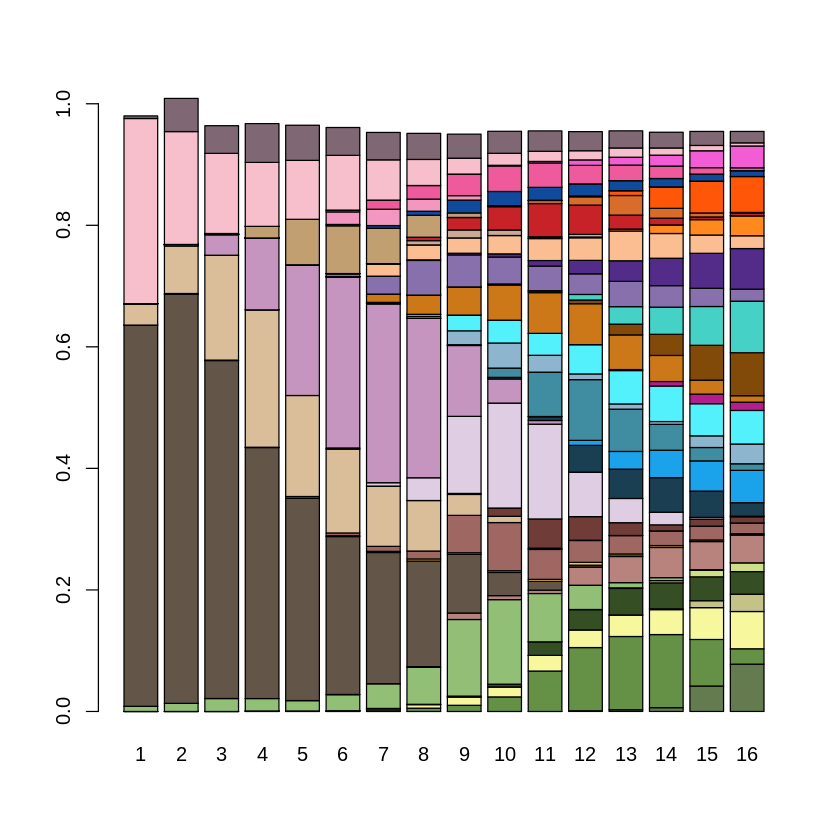

In [16]:
barplot(ct_ag_inf,col = rownames(ct_ag_inf))

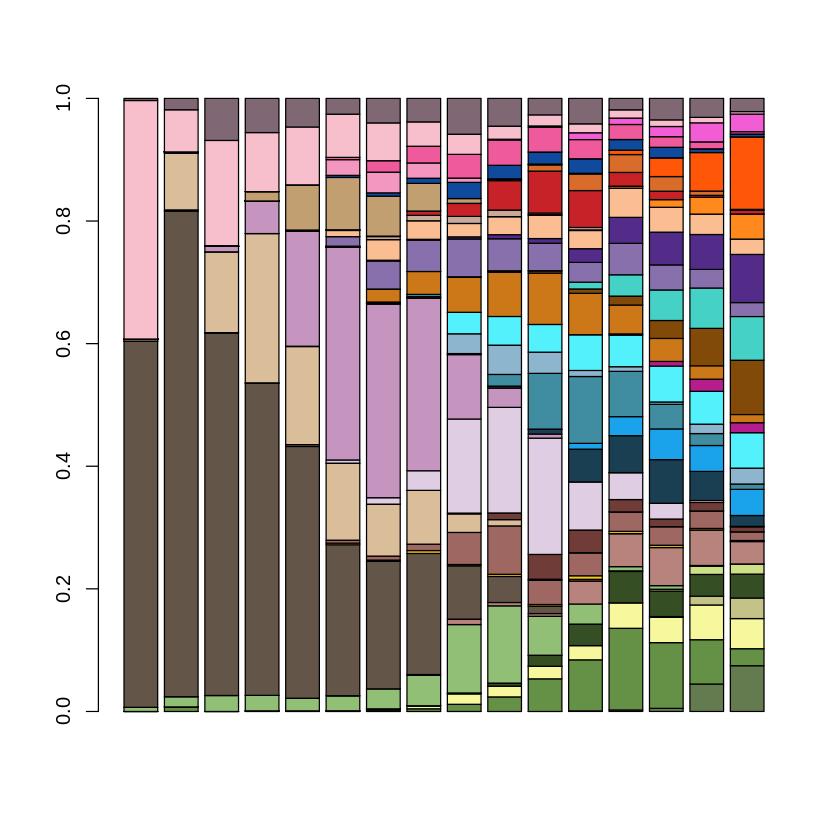

In [17]:
ct_ag_init = tgs_matrix_tapply(t(mct@mc_t),mc@colors,sum)
ct_ag_init = ct_ag_init[mc@color_key$color,]
barplot(ct_ag_init,col = rownames(ct_ag_init))